In [1]:
# importing important liberaries
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-white')

In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 1.0 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

     |████████████████████████████████| 243 kB 1.3 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [4]:
# LOading the dataa
ccdef = pd.read_excel('/kaggle/input/finance-dataset/Default.xlsx')
ccdef

/opt/conda/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [5]:
ccdef.shape

(10000, 5)

In [6]:
ccdef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [7]:
#checking NUll values
ccdef.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [8]:
# Summarizing data
ccdef.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


In [9]:
# Analysis of Zero Values in Predictors
(ccdef.balance == 0).sum(axis=0)

499

No     7056
Yes    2944
Name: student, dtype: int64


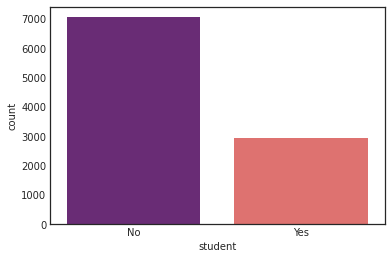

In [10]:
#Categorical Variable Analysis
print(ccdef.student.value_counts())
sns.countplot(x="student", data=ccdef, palette='magma');

No     9667
Yes     333
Name: default, dtype: int64


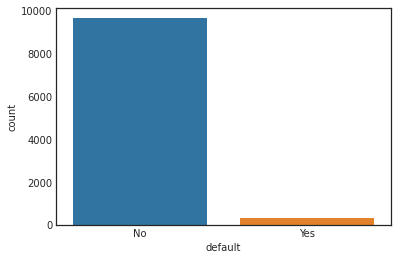

In [11]:
#Response Variable Analysis
print(ccdef.default.value_counts())
sns.countplot(x = 'default', data = ccdef);

***Encode Categorical Variables***

In [12]:
ccdef['default2'] = ccdef.default.factorize()[0]   
ccdef['student2'] = ccdef.student.factorize()[0] 

ccdef.head()

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0


# Logistic Regression - Sklearn

In [13]:
# training and testing data
X_train = ccdef.balance.values.reshape(-1,1)    

y = ccdef.default2

X_test = np.arange(ccdef.balance.min(), ccdef.balance.max()).reshape(-1 ,1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


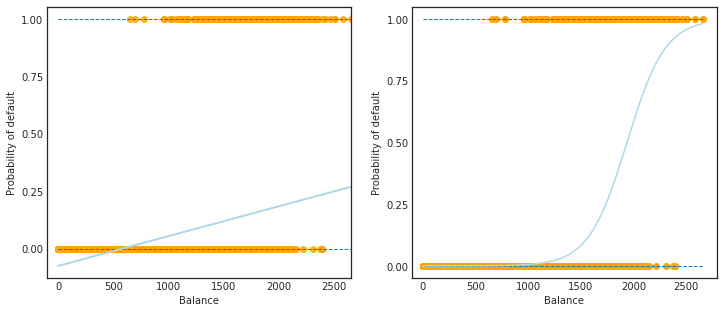

In [14]:
#Calculate probability using logistic regression
import sklearn.linear_model as skl_lm

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)                      
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) 
sns.regplot(ccdef.balance, ccdef.default2, order=1, ci=None,scatter_kws={'color':'orange'},line_kws={'color':'lightblue', 'lw':2}, ax=ax1) 

ax2.scatter(X_train, y, color='orange') 
ax2.plot(X_test, prob[:,1], color='lightblue') 
for ax in fig.axes: 
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1) 
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1) 
    ax.set_ylabel('Probability of default') 
    ax.set_xlabel('Balance') 
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.]) 
    ax.set_xlim(xmin=-100) 

In [15]:
 # Printing Cofficient and array of diatinct class
 print(clf)
 print('classes: ',clf.classes_)
 print('coefficients: ',clf.coef_)
 print('intercept :', clf.intercept_) 

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept : [-10.65132973]


***Logistic Regression Statsmodel***

In [16]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sms

pd.set_option('precision', 6)

X_train = sm.add_constant(ccdef.balance)

est = sm.Logit(y.ravel(), X_train).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [17]:
est.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


***Logistic Regression - Dummy Variable***

In [18]:
X_train = sm.add_constant(ccdef.student2)

y = ccdef.default2

est = sms.Logit(y, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


In [19]:
print(est.summary().tables[1].as_text())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.115      3.520      0.000       0.179       0.630


***Multiple Logistic Regression***

In [20]:
 X_train = sm.add_constant(ccdef[['balance', 'income', 'student2']])

 est = sms.Logit(y, X_train).fit()                    

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [21]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2      -0.6468      0.236     -2.738      0.006      -1.110      -0.184


***Cofunding***

In [22]:
#Create balance and default vectors for students

X_train = ccdef[ccdef.student == 'Yes'].balance.values.reshape(-1,1)
y = ccdef[ccdef.student == 'Yes'].default2

In [23]:
#Create balance and default vectors for non- students

X_train2 = ccdef[ccdef.student == 'No'].balance.values.reshape(-1,1)

y2 = ccdef[ccdef.student == 'No'].default2

In [24]:
# Create test vector
X_test = np.arange(ccdef.balance.min(), ccdef.balance.max()).reshape(-1,1) 

In [25]:
# Fit both dataset to Logistic Regression

clf = skl_lm.LogisticRegression(solver='newton-cg')

clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train,y)  

LogisticRegression(solver='newton-cg')

In [26]:
clf2.fit(X_train2,y2) 

LogisticRegression(solver='newton-cg')

In [27]:
# Calculate Probabilities

prob = clf.predict_proba(X_test)    

prob2 = clf2.predict_proba(X_test)

In [28]:
# Confusion Matrix
ccdef.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


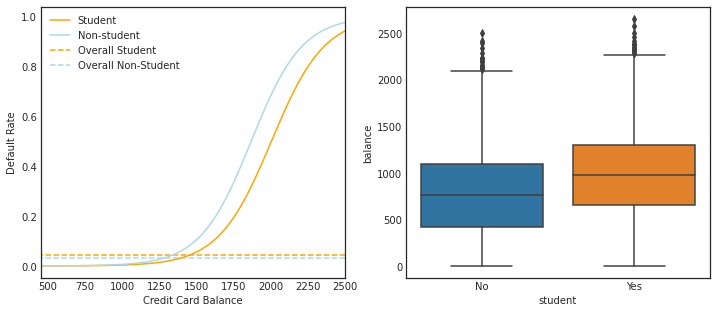

In [29]:
# Graphical Representation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) 
 
# Left plot 
ax1.plot(X_test, prob[:,1], color='orange', label='Student') 
ax1.plot(X_test, prob2[:,1], color='lightblue', label='Non-student') 
ax1.hlines(127/2817, colors='orange', label='Overall Student',xmin=ax1.xaxis.get_data_interval()[0],xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed') 
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',xmin=ax1.xaxis.get_data_interval()[0],xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed') 
ax1.set_ylabel('Default Rate') 
ax1.set_xlabel('Credit Card Balance') 
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.]) 
ax1.set_xlim(450,2500) 
ax1.legend(loc=2) 

# Right plot 
sns.boxplot('student', 'balance', data=ccdef, orient='v', ax=ax2);

# Linear Discriminant Analysis

***50% Threshold***

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = ccdef[['balance', 'income', 'student2']]
y = ccdef.default2        

lda = LinearDiscriminantAnalysis(solver='svd')

y_pred = lda.fit(X, y).predict(X)

ccdef_df = pd.DataFrame({'True default status': y, 'Predicted default status': y_pred})

ccdef_df.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)           

ccdef_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')  

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


*** 20% Threshold ***

In [31]:
decision_prob = 0.2                                                    
y_prob = lda.fit(X, y).predict_proba(X)                                

ccdef_df = pd.DataFrame({'True default status': y,'Predicted default status': y_prob[:,1] > decision_prob})                                   

ccdef_df.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True) 

ccdef_df.groupby(['Predicted default status','True default status']).size().unstack('True default status') 

True default status,No,Yes
Predicted default status,,
False,9435,140
True,232,193


IF any flaws in this kernal please let me know!!! :)